In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

To implement BFGS these constraints must be applied on B and B_inv
1. secant constraint
2. Symmetric constraint
3. Minimization contraint


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

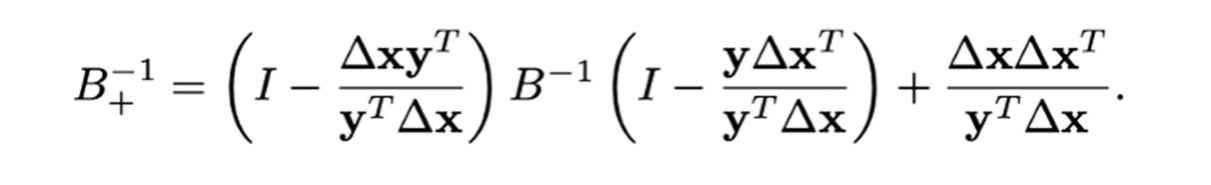

In [30]:
f = lambda x : x[0]**2 + x[1]**2
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
x0 = np.array([[10],
               [10]])

x1 = np.array([[9],
               [9]])

hessian = np.array([[2,0],
                    [0,2]])

f_dash = lambda x : np.array([[2*x[0][0]],
                              [2*x[1][0]]])
# r0 = f_dash(x0)
# r0

In [42]:
def BFGS(x0,x1,tol = 0.001, iterations = 40, learning_rate = 1):
    b = np.eye(2)
    for i in range(iterations):
        x_delta = x1 - x0
        y = f_dash(x1) - f_dash(x0)
        
        prt_1 = (np.eye(2) - ((x_delta@y.T)/(y.T@x_delta)))
        prt_2 = ((np.eye(2) - (y @ x_delta.T)/(y.T@x_delta)))                                                            
        prt_3 = ((x_delta@x_delta.T)/(y.T@x_delta))
        
        # gradient of current x_ 
        B_inv_plus = prt_1 @ b @ prt_2 + prt_3  
        x_new = x1 - (B_inv_plus@f_dash(x1)*learning_rate) 
        x0 = x1
        x1 = x_new
        if np.linalg.norm(f_dash(x_new)) < tol:
            print("Stopped at iteration {}".format(i+1))
            break
    return x_new , B_inv_plus

In [44]:
r0 ,B_inv_plus= BFGS(x0,x1)
print(r0)
print(fr0)

Stopped at iteration 1
[[0.]
 [0.]]
[[ 0.75 -0.25]
 [-0.25  0.75]]
